In [ ]:
!pip install pandas geopandas osmnx requests beautifulsoup4 schedule

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import osmnx as ox

tags = {"highway"=="motorway"}



In [ ]:
# fetching the graph data :


G = ox.graph_from_place('Delhi', network_type='drive', custom_filter=tags)
print("Network graph fetched successfully.")

    # Convert the graph into a GeoDataFrame of edges (the roads themselves).
    # We are primarily interested in the road segments for congestion analysis.
roads_gdf = ox.graph_to_gdfs(G, nodes=False, edges=True)

print(f"Successfully converted graph to GeoDataFrame with {len(roads_gdf)} road segments.")

    # Reset the index to make 'u', 'v', 'key' available as columns if needed later.
roads_gdf.reset_index(inplace=True)

Network graph fetched successfully.
Successfully converted graph to GeoDataFrame with 498074 road segments.


In [ ]:
roads_gdf.head()

,u,v,key,osmid,highway,name,oneway,reversed,length,geometry,...,maxspeed,bridge,ref,junction,access,width,tunnel,area,service,est_width
0,58056528,301037382,0,590609974,primary,Nelson Mandela Marg,True,False,31.509355,"LINESTRING (77.171 28.55939, 77.17125 28.55957)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58056528,7612915570,0,"[558065085, 558065079]",secondary,Palam Marg,True,False,325.637170,"LINESTRING (77.171 28.55939, 77.17018 28.56011...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60890393,6436786516,0,1121966690,residential,NaN,False,True,17.640539,"LINESTRING (77.17495 28.58062, 77.17511 28.58069)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60890393,6110396131,0,25744598,tertiary,NaN,True,False,156.010558,"LINESTRING (77.17495 28.58062, 77.17504 28.580...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60890393,280740684,0,"[583917363, 1312224221, 44317159]",primary,Moti Bagh Flyover,True,False,621.717997,"LINESTRING (77.17495 28.58062, 77.17517 28.580...",...,60,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
roads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 498074 entries, 0 to 498073
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   u          498074 non-null  int64   
 1   v          498074 non-null  int64   
 2   key        498074 non-null  int64   
 3   osmid      498074 non-null  object  
 4   highway    498074 non-null  object  
 5   name       55623 non-null   object  
 6   oneway     498074 non-null  bool    
 7   reversed   498074 non-null  object  
 8   length     498074 non-null  float64 
 9   geometry   498074 non-null  geometry
 10  lanes      8531 non-null    object  
 11  maxspeed   4971 non-null    object  
 12  bridge     2135 non-null    object  
 13  ref        1033 non-null    object  
 14  junction   1026 non-null    object  
 15  access     18242 non-null   object  
 16  width      646 non-null     object  
 17  tunnel     213 non-null     object  
 18  area       20 non-null      object  

In [ ]:
selected_cols = ['v','u', 'osmid', 'name', 'highway', 'length', 'geometry']
existing_required_columns = [col for col in selected_cols if col in roads_gdf.columns]
roads_gdf_cleaned = roads_gdf[existing_required_columns]
output_path = "india_highways.gpkg"
# roads_gdf_cleaned.to_file(output_path, driver='GPKG')

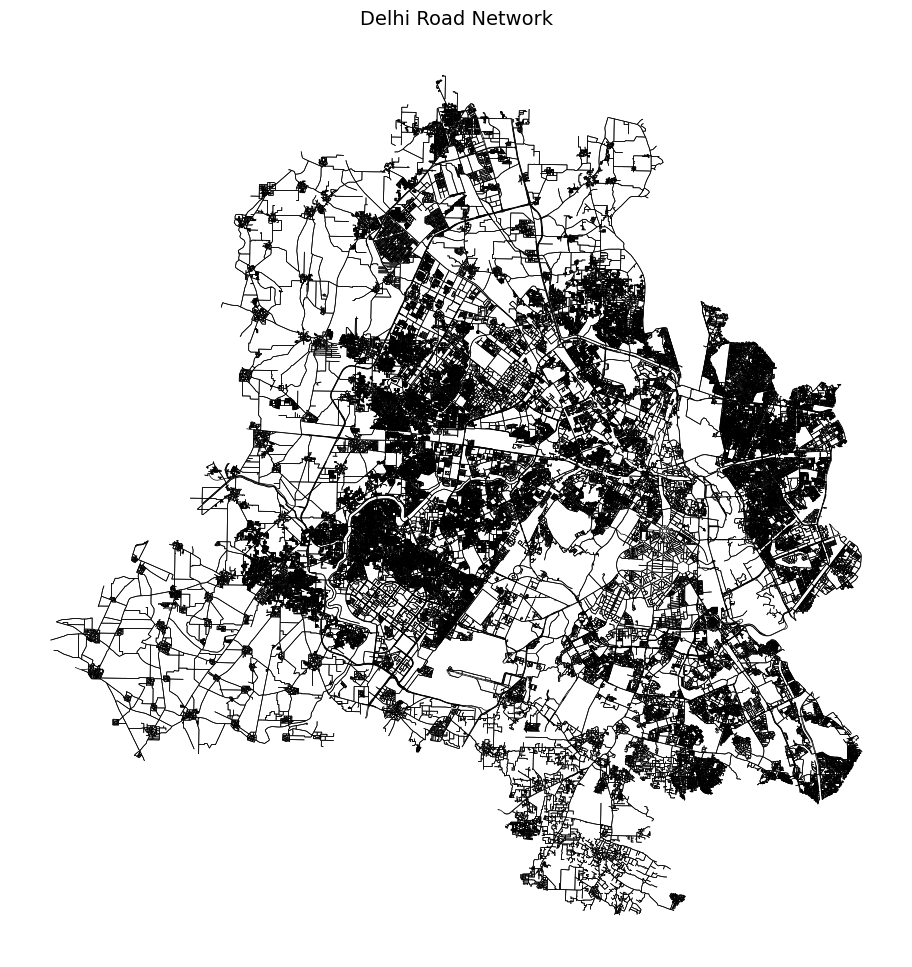

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Example: assuming gdf is already loaded
roads_gdf_cleaned.plot(figsize=(12, 12), linewidth=0.5, color='black')
plt.title("Delhi Road Network", fontsize=14)
plt.axis('off')
plt.show()


In [ ]:
# only highway data :


# fetching the graph data :


G = ox.graph_from_place('Delhi', network_type='drive', custom_filter= {"highway": ["primary"]})
print("Network graph fetched successfully.")

    # Convert the graph into a GeoDataFrame of edges (the roads themselves).
    # We are primarily interested in the road segments for congestion analysis.
smolroads_gdf = ox.graph_to_gdfs(G, nodes=False, edges=True)

print(f"Successfully converted graph to GeoDataFrame with {len(smolroads_gdf)} road segments.")

    # Reset the index to make 'u', 'v', 'key' available as columns if needed later.
smolroads_gdf.reset_index(inplace=True)

Network graph fetched successfully.
Successfully converted graph to GeoDataFrame with 498074 road segments.


In [ ]:
existing_required_columns = [col for col in selected_cols if col in roads_gdf.columns]
smolroads_gdf_cleaned = smolroads_gdf[existing_required_columns]

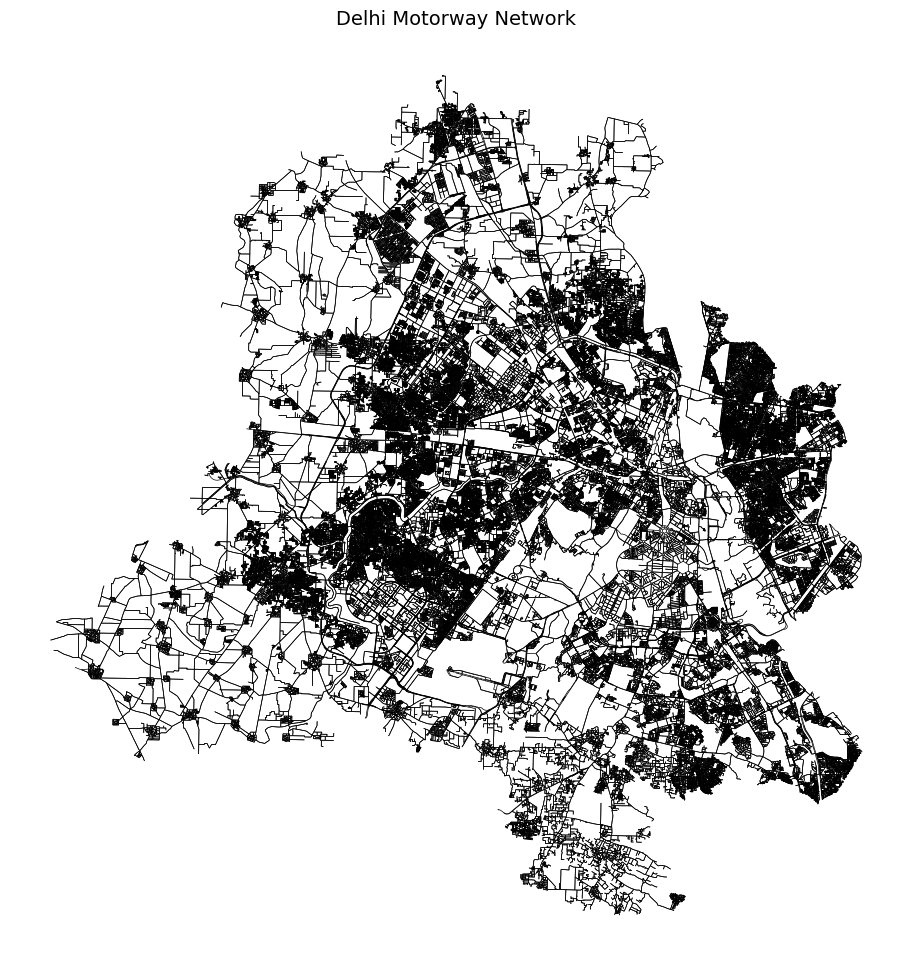

In [ ]:

# Example: assuming gdf is already loaded
smolroads_gdf_cleaned.plot(figsize=(12, 12), linewidth=0.5, color='black')
plt.title("Delhi Motorway Network", fontsize=14)
plt.axis('off')
plt.show()

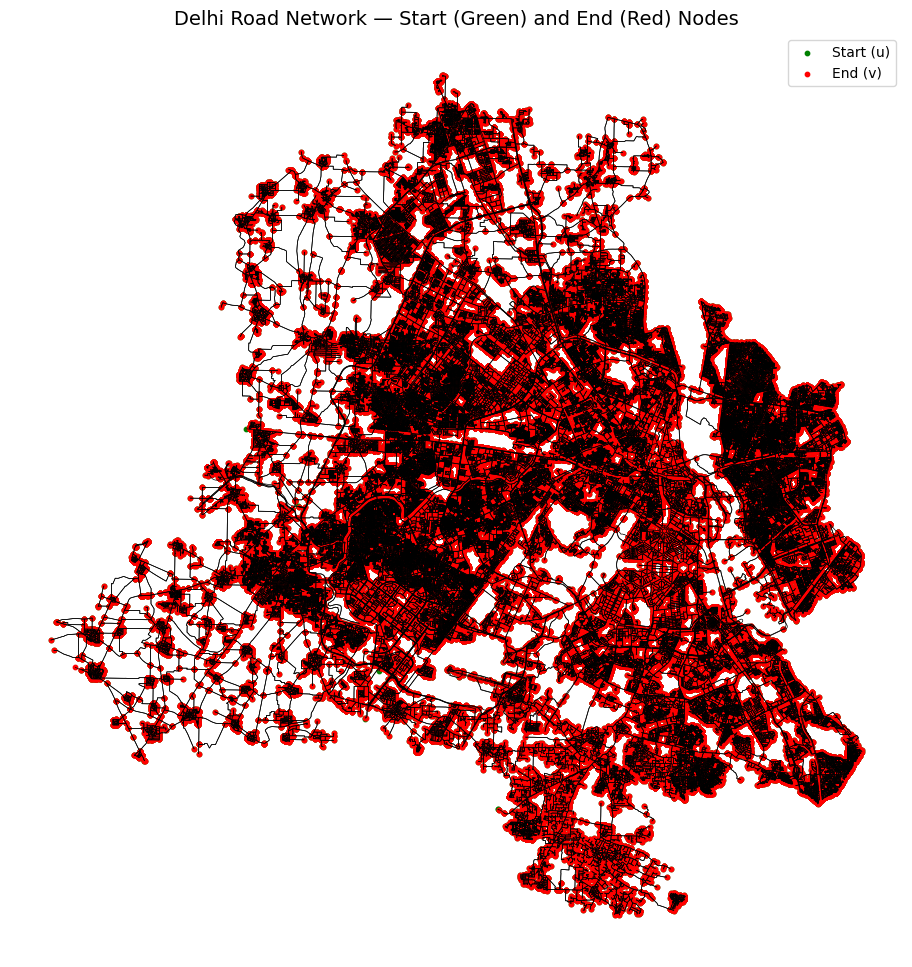

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Assuming roads_gdf is already loaded
gdf = smolroads_gdf_cleaned

# --- Plot the base road network in black ---
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, linewidth=0.5, color='black')

# --- Extract start (u) and end (v) coordinates from LineStrings ---
start_points = gdf.geometry.apply(lambda geom: Point(geom.coords[0]))
end_points = gdf.geometry.apply(lambda geom: Point(geom.coords[-1]))

# --- Create GeoDataFrames for visualization ---
gdf_start = gpd.GeoDataFrame(gdf[['u']], geometry=start_points, crs=gdf.crs)
gdf_end = gpd.GeoDataFrame(gdf[['v']], geometry=end_points, crs=gdf.crs)

# --- Overlay start and end points ---
gdf_start.plot(ax=ax, color='green', markersize=10, label='Start (u)')
gdf_end.plot(ax=ax, color='red', markersize=10, label='End (v)')

# --- Formatting ---
plt.title("Delhi Road Network — Start (Green) and End (Red) Nodes", fontsize=14)
plt.axis('off')
plt.legend()
plt.show()


In [ ]:
# fetching the graph data :


G =  ox.features.features_from_place('India', tags)
print("Network graph fetched successfully.")

    # Convert the graph into a GeoDataFrame of edges (the roads themselves).
    # We are primarily interested in the road segments for congestion analysis.
new_roads_gdf = ox.graph_to_gdfs(G, nodes=False, edges=True)

print(f"Successfully converted graph to GeoDataFrame with {len(new_roads_gdf)} road segments.")

    # Reset the index to make 'u', 'v', 'key' available as columns if needed later.
new_roads_gdf.reset_index(inplace=True)

/usr/local/lib/python3.12/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 3,032 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
existing_required_columns = [col for col in selected_cols if col in new_roads_gdf.columns]
smolroads_gdf_cleaned = smolroads_gdf[existing_required_columns]

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Assuming roads_gdf is already loaded
gdf = smolroads_gdf_cleaned

# --- Plot the base road network in black ---
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, linewidth=0.5, color='black')

# --- Extract start (u) and end (v) coordinates from LineStrings ---
start_points = gdf.geometry.apply(lambda geom: Point(geom.coords[0]))
end_points = gdf.geometry.apply(lambda geom: Point(geom.coords[-1]))

# --- Create GeoDataFrames for visualization ---
gdf_start = gpd.GeoDataFrame(gdf[['u']], geometry=start_points, crs=gdf.crs)
gdf_end = gpd.GeoDataFrame(gdf[['v']], geometry=end_points, crs=gdf.crs)

# --- Overlay start and end points ---
gdf_start.plot(ax=ax, color='green', markersize=10, label='Start (u)')
gdf_end.plot(ax=ax, color='red', markersize=10, label='End (v)')

# --- Formatting ---
plt.title("Delhi Road Network — Start (Green) and End (Red) Nodes", fontsize=14)
plt.axis('off')
plt.legend()
plt.show()

# google api
